# **Simulation Dataset + Basic Plot**
*Note: The results presented are derived from simulated data, utilizing components of Velocity, Growth, Score, and Interaction.*

In [4]:
import pandas as pd
import scanpy as sc
import numpy as np
from anndata import AnnData
import CytoBridge as cb
import os


## **1. Load Trained Data and Model**
- Load the trained data from the specified H5AD file and load the associated model.


In [5]:
save_path = "/home/sjt/workspace2/CytoBridge_test-main_crufm/results/cyexperiment_simulation/adata.h5ad"      
exp_name      = os.path.basename(os.path.dirname(save_path))      # -> results_unscore
base_fig_dir  = "/home/sjt/workspace2/CytoBridge_test-main_crufm/figures"
output_path   = os.path.join(base_fig_dir, exp_name)
os.makedirs(output_path, exist_ok=True)


adata  = sc.read_h5ad(save_path)
model  = cb.utils.load_model_from_adata(adata)
device = "cuda"

Reconstructing model...
Model loaded successfully.


## **2.Dissecting Learned Dynamics on Observed Data**

- ### **2.1 Plot Velocity stream**  
  &nbsp;&nbsp;If the model includes velocity components, plot the velocity stream. (intrinsic velocity)

saving figure to file /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/scvelo_Velocity_Stream_Plot.svg


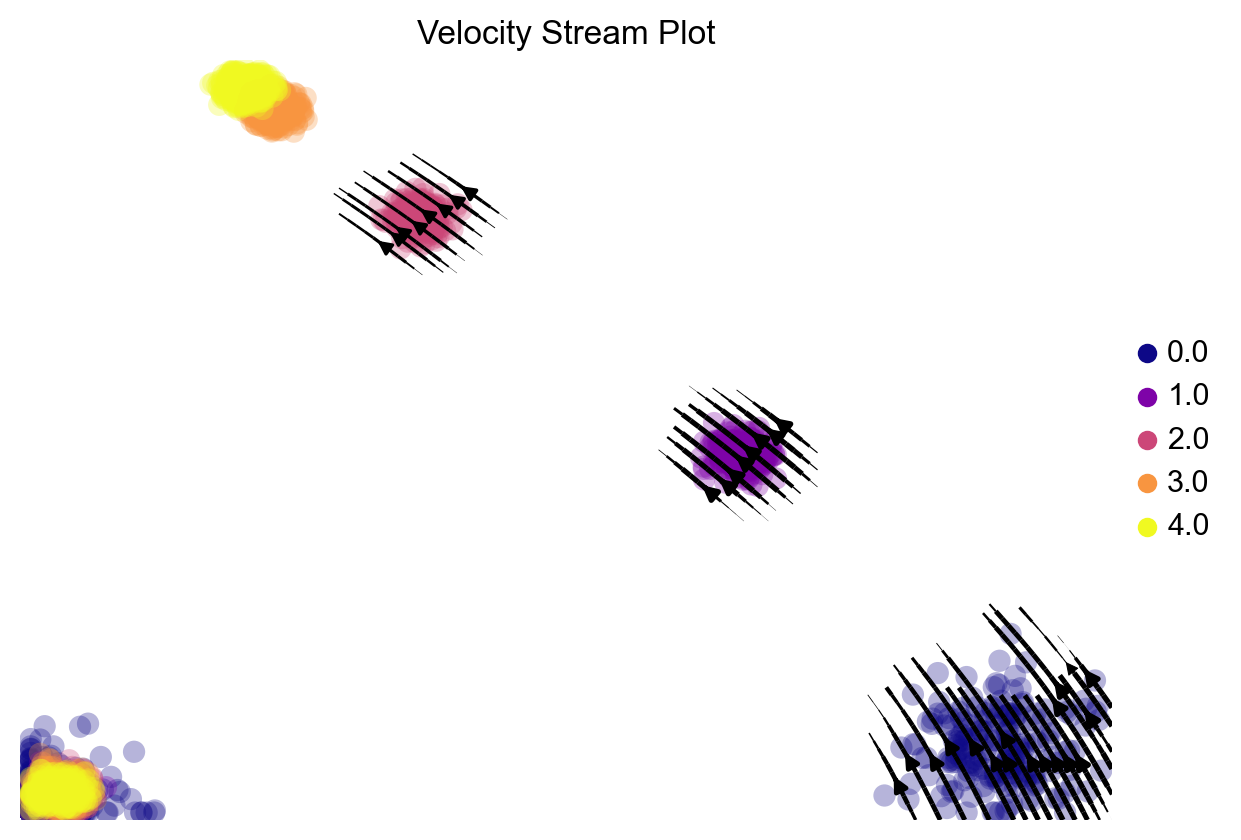

Velocity stream plot saved to: /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/Velocity_Stream_Plot.svg


In [3]:
if 'velocity_latent' in adata.obsm:
    cb.pl.plot_velocity_stream(adata, model,output_path, dim_reduction='none', device='cuda')

- ### **2.2 Plot Score Velocity**  
  &nbsp;&nbsp;If the model includes Score components, plot the Score velocity stream. (diffusion velocity --- Stochasticity)

saving figure to file /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/scvelo_Score_Stream_Plot.svg


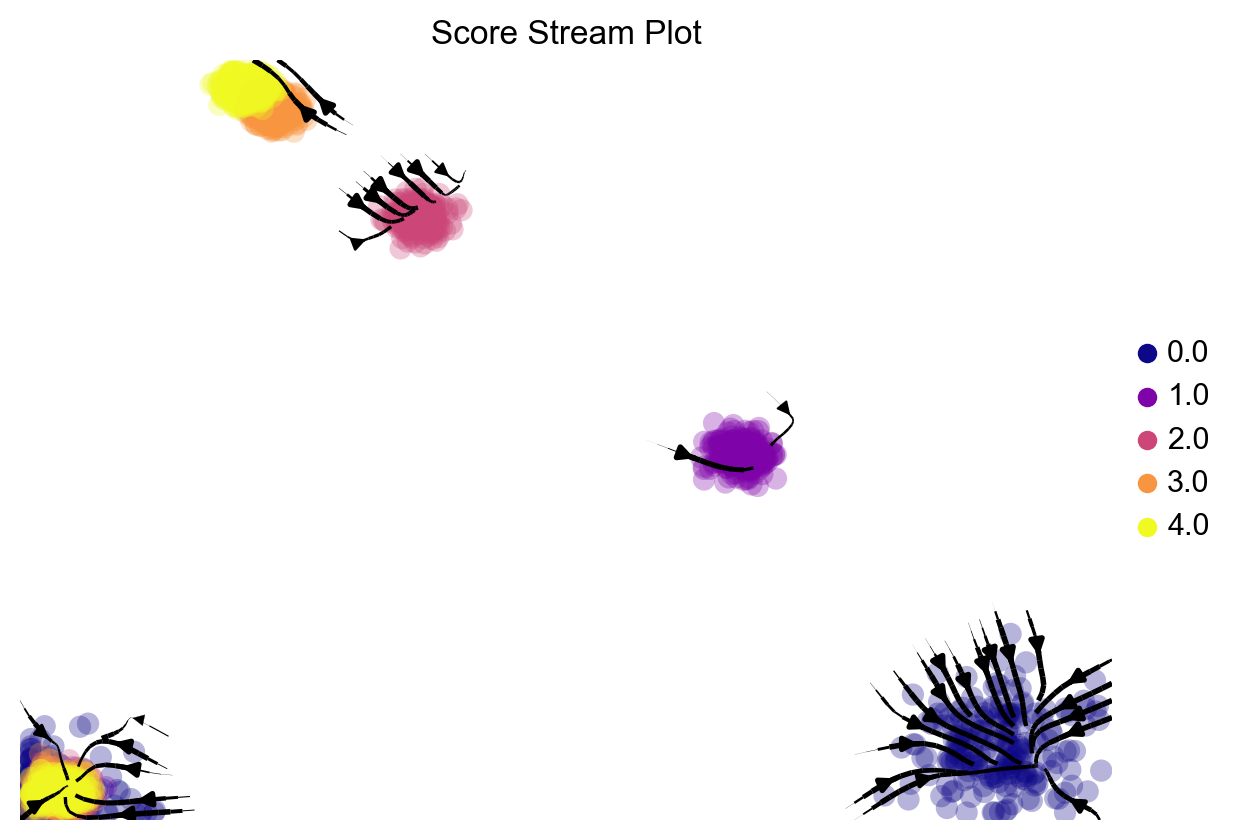

Score function diffusion velocity stream plot saved to: /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/Score_Stream_Plot.svg


In [3]:
if 'score_latent' in adata.obsm :
    cb.pl.plot_score_stream(adata,model, output_path, dim_reduction='none', device='cuda')


- ### **2.3 Plot Interaction Velocity**  
  &nbsp;&nbsp;If the model includes interaction components, plot the interaction potential and interaction stream.

Reconstructing model...
Model loaded successfully.
interaction_force use use_mass, True
saving figure to file /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/scvelo_Interaction_Force_Stream_Plot.svg


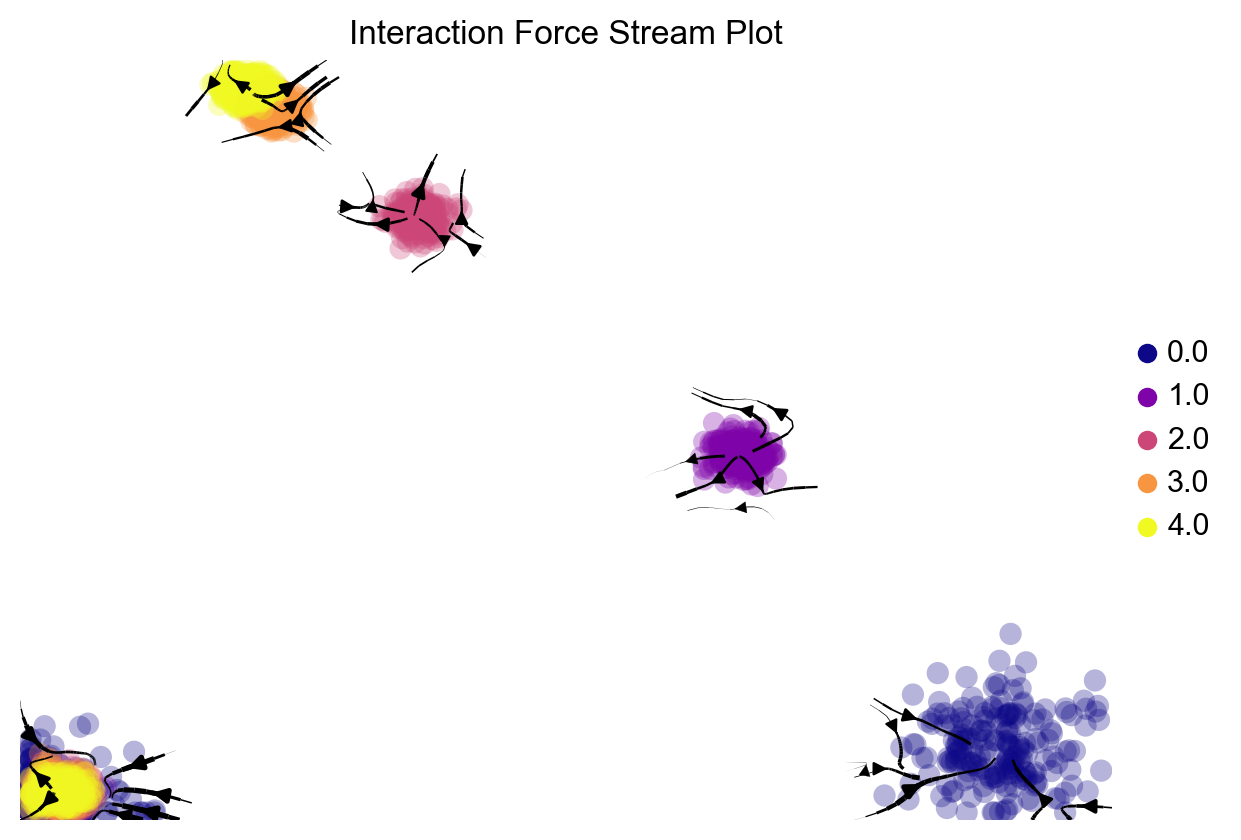

Interaction force stream plot saved to: /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/Interaction_Force_Stream_Plot.svg
[0. 0. 0. ... 0. 0. 0.]
Interaction potential plot saved to: /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/interaction_plot.png


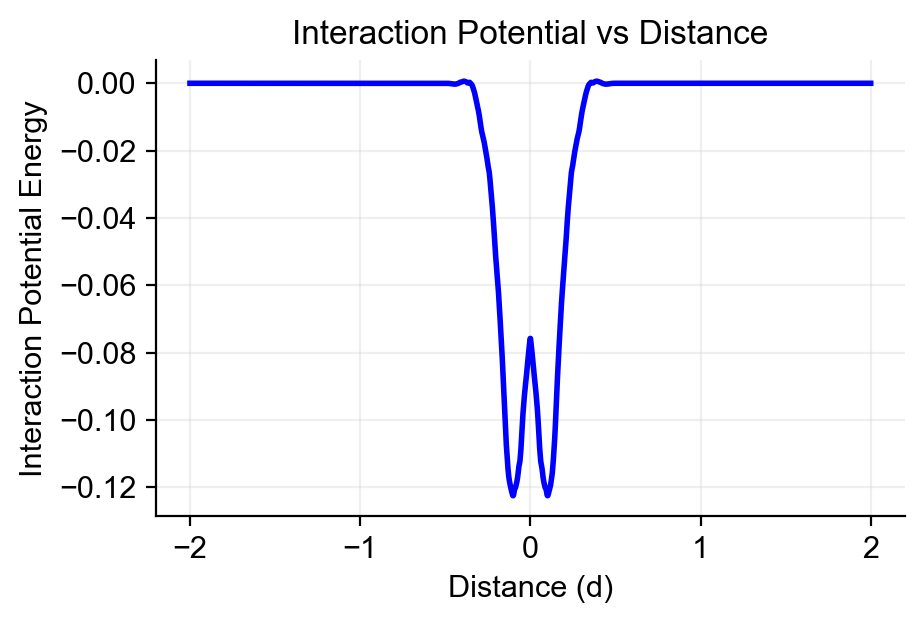

In [6]:
if "interaction" in adata.uns['all_model']['model_config']['components']:
    cb.pl.plot_interaction_stream(adata, output_path, dim_reduction='none', device='cuda')   
    cb.pl.plot_interaction_potential(model, d=2, num_points=2000,output_path=os.path.join(output_path, "interaction_plot.png"))


- ### **2.4 Plot All Velocity stream**  
  &nbsp;&nbsp;If the model includes Velocity,Score components, plot All velocity stream.


/home/ubuntu/anaconda3/envs/DeepRUOTv2/lib/python3.10/site-packages/torch/autograd/graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


saving figure to file /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/scvelo_All_Velocity_Stream.svg


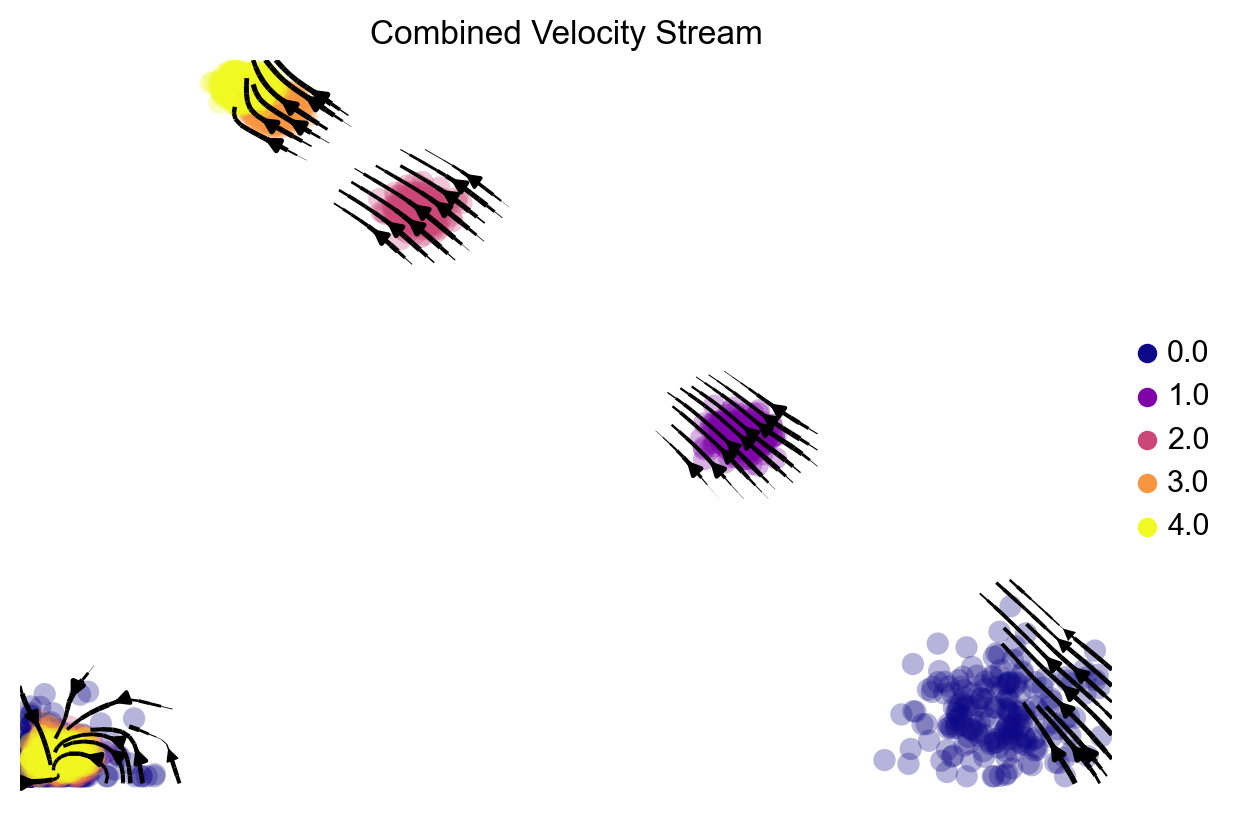

All velocity stream plot saved to: /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/All_Velocity_Stream.svg


In [4]:
if 'score_latent' in adata.obsm and 'velocity_latent' in adata.obsm:
    cb.pl.plot_combined_velocity_stream(adata,model,output_path,dim_reduction='none',device='cuda')

- ### **2.5 Plot Growth Rates**  
  &nbsp;&nbsp;If the model includes Growth,Score components, visualize the growth rates of the data.


[plot_growth] saved to -> /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/g_values_plot.png


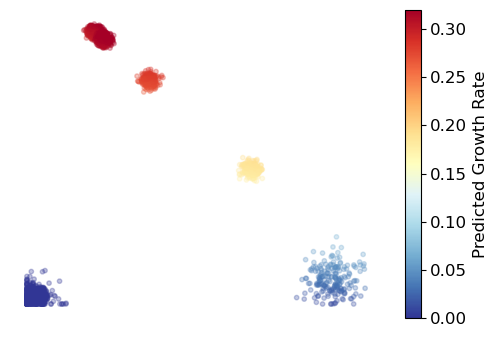

In [3]:
CytoBridge.pl.plot_growth(
    adata,
    dim_reduction='none',
    output_path=os.path.join(output_path, "g_values_plot.png")
)

- ### **2.6 Plot Potential Landscape**  
  &nbsp;&nbsp;If the model includes Velocity, Visualize the potential landscape of the data.

/home/ubuntu/anaconda3/envs/DeepRUOTv2/lib/python3.10/site-packages/torch/autograd/graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 0, PotentialNet_loss: 0.136099
Epoch 500, PotentialNet_loss: 0.012659
Epoch 1000, PotentialNet_loss: 0.020549
Epoch 1500, PotentialNet_loss: 0.021196


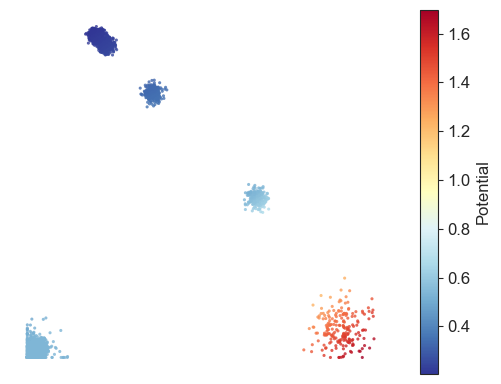

In [3]:
CytoBridge.pl.plot_landscape(adata,model,output_path=output_path,dim_reduction="none",device="cuda")


## **3.Generating Unobserved Cellular Behaviors**

- ### **3.1 Generating Deterministic Trajectories via ODEs**  
  &nbsp;&nbsp;Generate the initial-data dynamics using a stochastic differential equation (SDE) model that incorporates both Velocity components.

/home/ubuntu/anaconda3/envs/DeepRUOTv2/lib/python3.10/site-packages/torch/autograd/graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


[generate_ode_trajectories] trajectories saved to /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/ode_results
[plot_ode_trajectories] saved to -> /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/ode_results/ode_trajectories.pdf


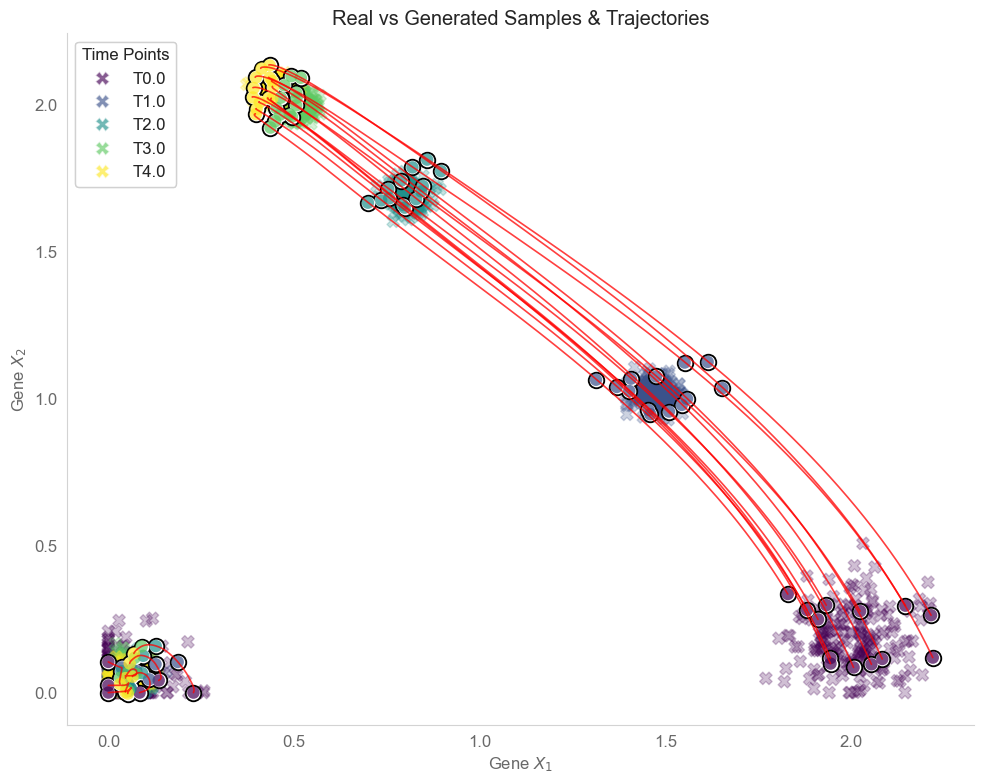

[ode_trajectories] done -> /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/ode_results/ode_trajectories.pdf


In [5]:
CytoBridge.pl.plot_ode_trajectories(
    adata=adata,
    model=model,
    output_path=output_path,
    n_trajectories=20,
    n_bins=20,
    dim_reduction='none',
    device=device
)

- ### **3.2 Generating Stochastic Trajectories via ODEs**
  &nbsp;&nbsp;Generate the initial-data dynamics using a stochastic differential equation (SDE) model that incorporates both velocity and score-based components.

Using device: cuda
Loading model from adata...
Reconstructing model...
Model loaded successfully.
Model components: ['velocity' 'growth' 'score' 'interaction']
Plotting SDE trajectories...
SDE trajectory plot saved to: /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/cyexperiment_simulation/sde_results/sde_trajectories.pdf


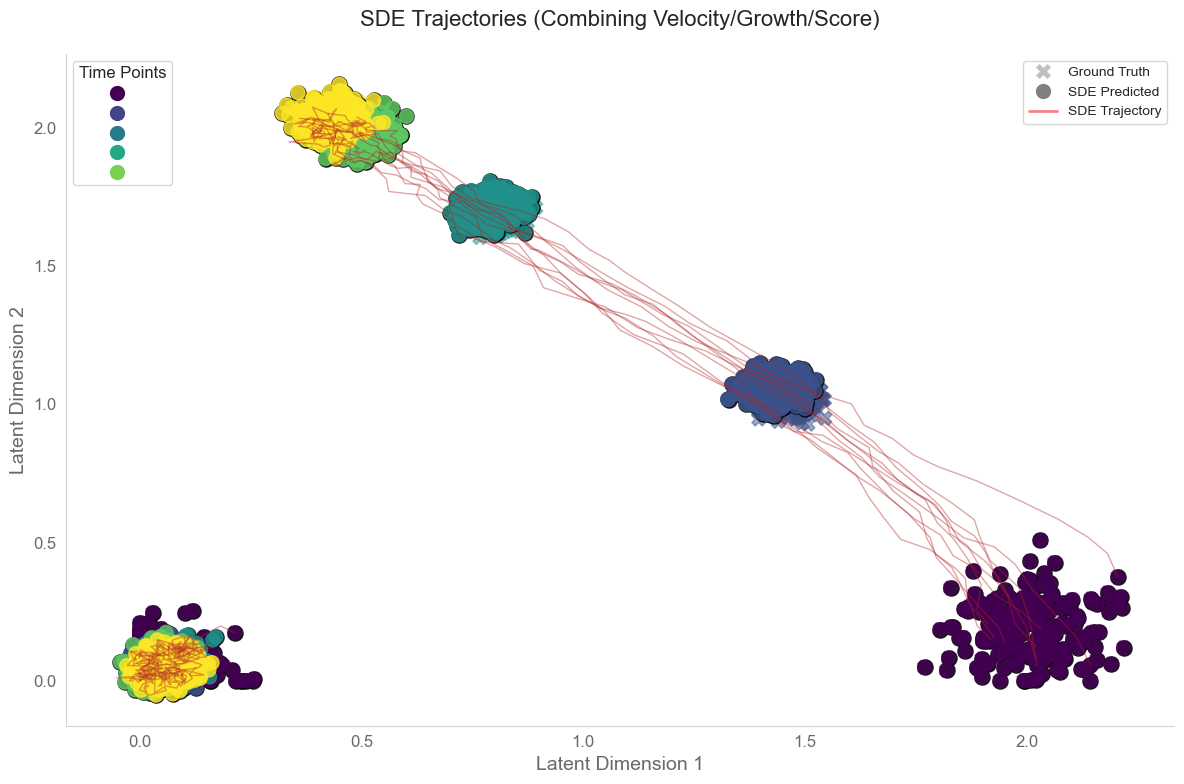

In [6]:
adata = CytoBridge.pl.plot_sde_trajectories(
    adata=adata,
    output_path=os.path.join(output_path, "sde_results"),  
    device=device,
    sigma=0.05,
    dim_reduction='none',
    n_trajectories=20,
    n_bins=50,
)